In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Final.csv')
df.head()

,Type,Area,Rent,Deposit,Built-up Area,Furnishing,No_of_Bedrooms
0,1 BHK,Andheri West,25000,75000,850,Unfurnished,1
1,1 BHK,Andheri East,32500,100000,580,Semi furnished,1
2,1 BHK,Andheri West,10000,15000,500,Unfurnished,1
3,1 BHK,Andheri East,35000,120000,644,Semi furnished,1
4,1 BHK,Andheri West,45000,150000,513,Semi furnished,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
df.describe()

,Rent,Deposit,Built-up Area,No_of_Bedrooms
count,299.000000,2.990000e+02,299.000000,299.000000
mean,46731.772575,2.131335e+05,664.949833,1.304348
std,36065.745147,2.965777e+05,398.939274,0.943548
min,35.000000,1.000000e+00,100.000000,0.000000
25%,20500.000000,6.250000e+04,400.000000,1.000000
50%,40000.000000,1.500000e+05,600.000000,1.000000
75%,60000.000000,2.400000e+05,850.000000,2.000000
max,250000.000000,2.500000e+06,3400.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            299 non-null    object
 1   Area            299 non-null    object
 2   Rent            299 non-null    int64 
 3   Deposit         299 non-null    int64 
 4   Built-up Area   299 non-null    int64 
 5   Furnishing      299 non-null    object
 6   No_of_Bedrooms  299 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 16.5+ KB


In [6]:
df.isna().sum()

Type              0
Area              0
Rent              0
Deposit           0
Built-up Area     0
Furnishing        0
No_of_Bedrooms    0
dtype: int64

In [7]:
df.dtypes

Type              object
Area              object
Rent               int64
Deposit            int64
Built-up Area      int64
Furnishing        object
No_of_Bedrooms     int64
dtype: object

# Minimum, Maximum, Average Rent per Location

In [37]:
rent_stats = df.groupby('Area')['Rent'].agg(['min', 'max', 'mean']).reset_index()
print(rent_stats)

              Area    min     max          mean
0           Amboli  38000   38000  38000.000000
1     Andheri East   2500  180000  38789.710526
2     Andheri West     35  200000  54990.633588
3    Goregaon West  12000   80000  58000.000000
4  Jogeshwari East  36000   36000  36000.000000
5  Jogeshwari West   8000  109000  37407.407407
6            Marol   2000  162000  48125.000000
7            Powai   8500   60000  31500.000000
8         Varsova    5000  250000  70916.666667


# Correlation heatmap

C:\Users\harsh\AppData\Local\Temp\ipykernel_17800\2964243034.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True, cmap='coolwarm')


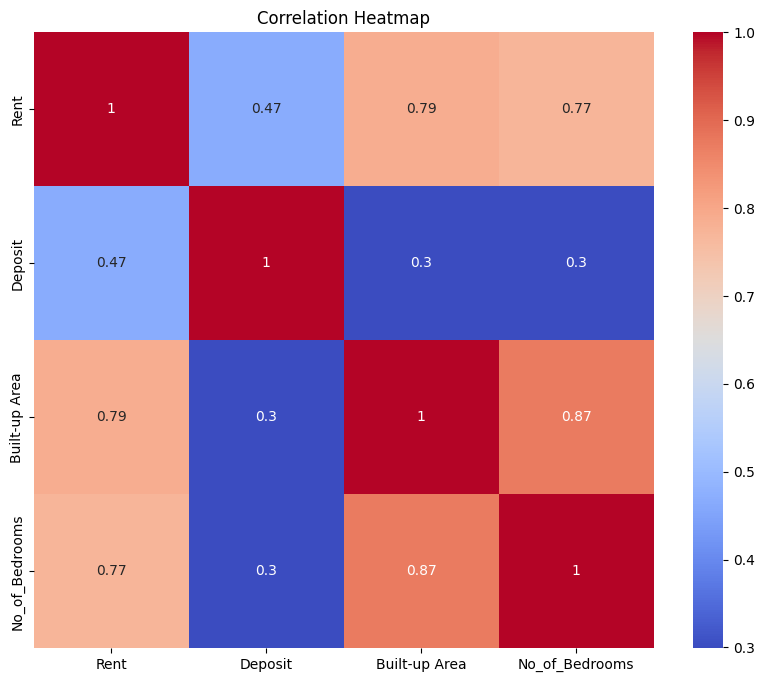

In [8]:
plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Home types

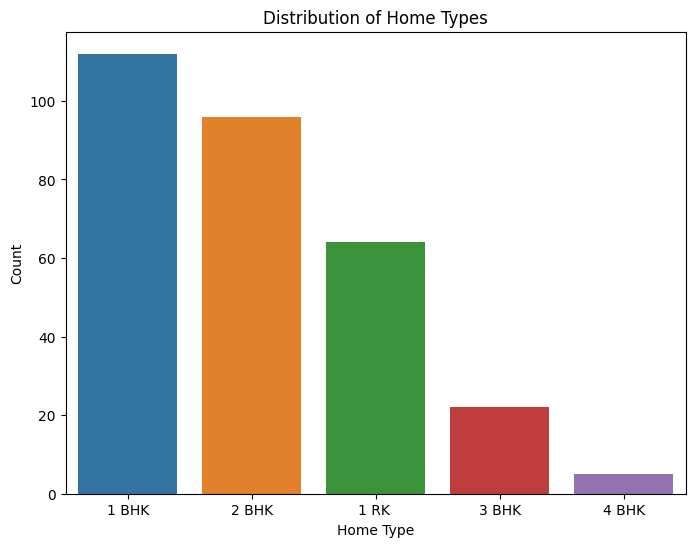

In [9]:
plt.figure(figsize=(8, 6))
sb.countplot(x='Type', data=df)
plt.title('Distribution of Home Types')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.show()

# Distribution of Apartment Areas

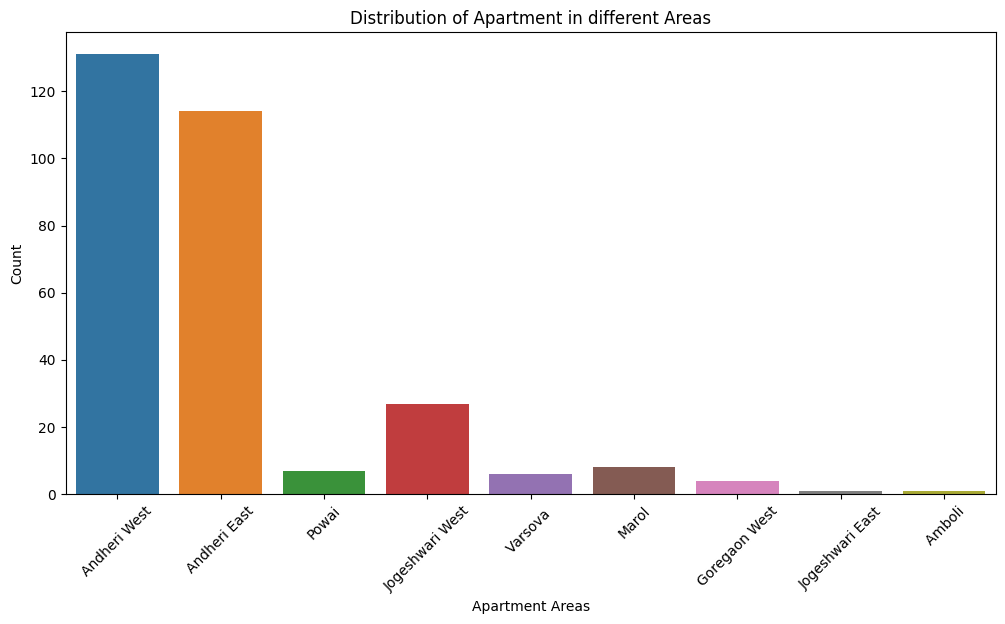

In [10]:
plt.figure(figsize=(12, 6))
sb.countplot(x='Area', data=df)
plt.title('Distribution of Apartment in different Areas')
plt.xlabel('Apartment Areas')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Rent

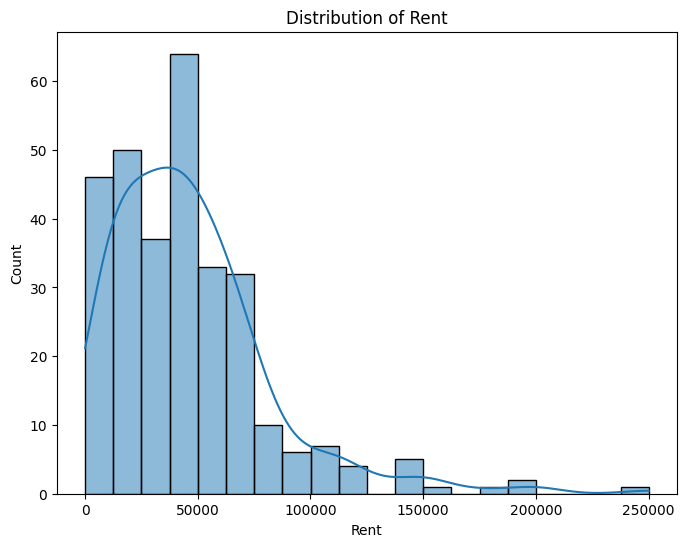

In [11]:
plt.figure(figsize=(8, 6))
sb.histplot(df['Rent'], bins=20, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Count')
plt.show()

# Scatter plot of Rent vs. Built-up Area

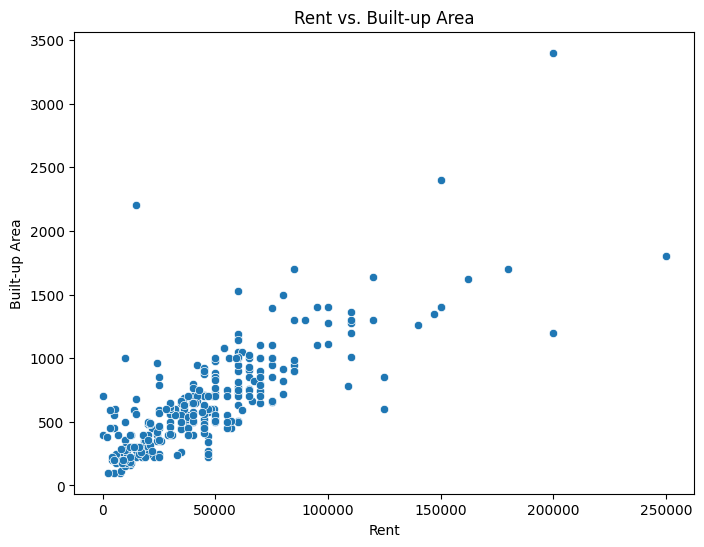

In [13]:
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Rent', y='Built-up Area', data=df)
plt.title('Rent vs. Built-up Area')
plt.xlabel('Rent')
plt.ylabel('Built-up Area')
plt.show()

# Bar plot of Furnishing types

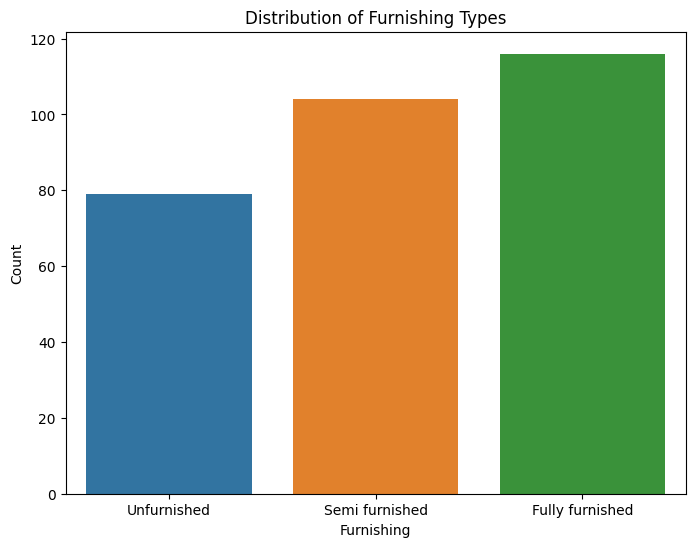

In [14]:
plt.figure(figsize=(8, 6))
sb.countplot(x='Furnishing', data=df)
plt.title('Distribution of Furnishing Types')
plt.xlabel('Furnishing')
plt.ylabel('Count')
plt.show()

# Bedrooms Counts

In [17]:
bedroom_counts = df['No_of_Bedrooms'].value_counts()
print(bedroom_counts)

1    112
2     96
0     64
3     22
4      5
Name: No_of_Bedrooms, dtype: int64


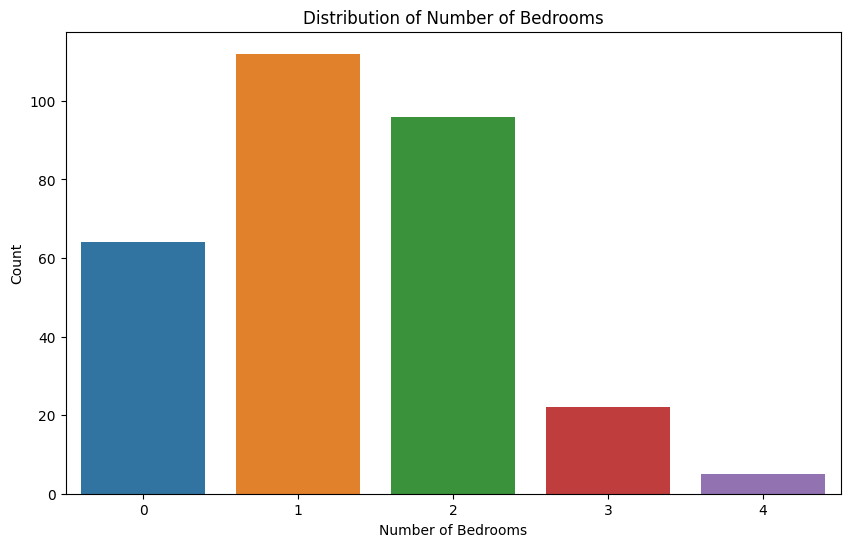

In [20]:
plt.figure(figsize=(10, 6))
sb.countplot(x='No_of_Bedrooms', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Number of Bedrooms')
plt.xticks(rotation=0)
plt.show()

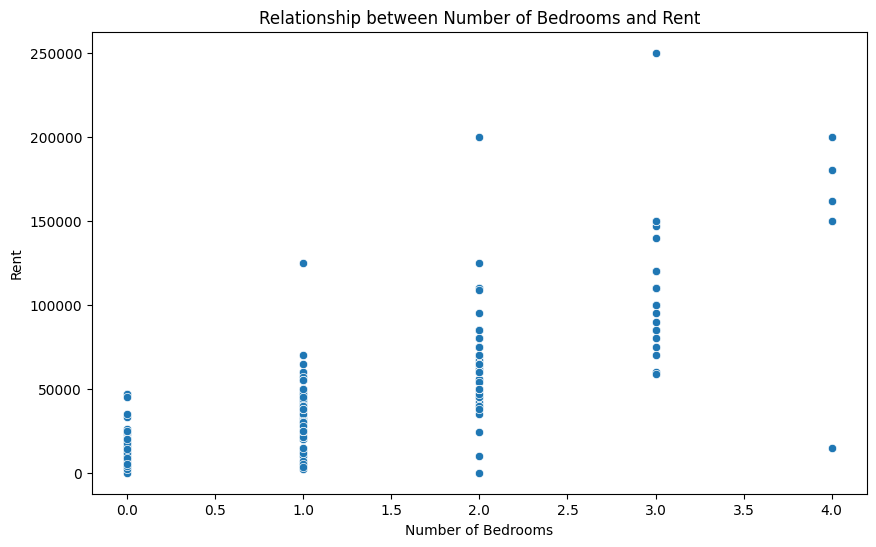

In [23]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='No_of_Bedrooms', y='Rent', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent')
plt.title('Relationship between Number of Bedrooms and Rent')
plt.show()

## Outliers

In [25]:
num= []
cat = []
for i in df.columns:
    if df[i].dtypes == "O":
        cat.append(i)
    else:
        num.append(i)

In [26]:
num

['Rent', 'Deposit', 'Built-up Area', 'No_of_Bedrooms']

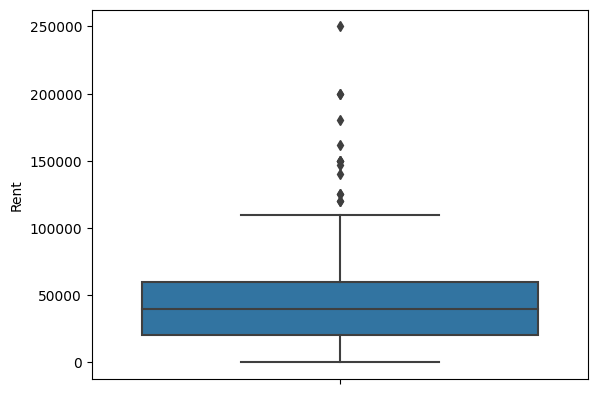

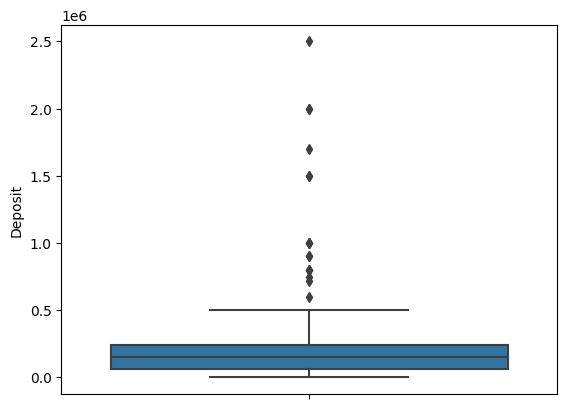

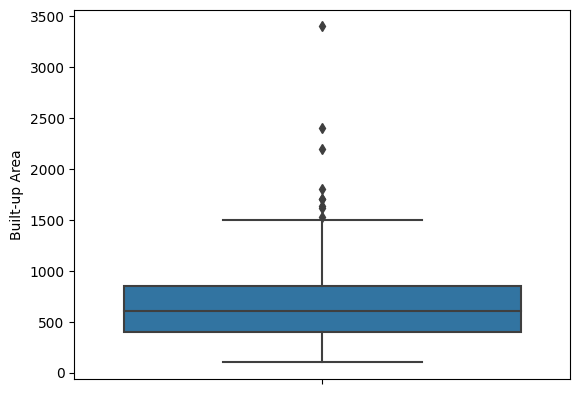

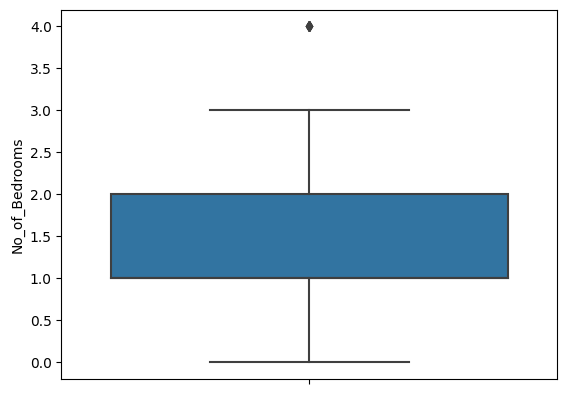

In [28]:
for i in num:
    plt.figure()
    sb.boxplot(y=i, data = df)